## 导入库

In [1]:
from __future__ import  absolute_import,division,print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print('Tensorflow Version: {}'.format(tf.__version__))
print('Eager execution: {}'.format(tf.executing_eagerly()))

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow Version: 1.10.0
Eager execution: True


## 导入和解析数据集

In [2]:
train_data_url = "http://download.tensorflow.org/data/iris_training.csv"
#train_data_fliepath
train_data_fp = tf.keras.utils.get_file(fname=os.path.basename(train_data_url),
                                        origin=train_data_url)

print('Local copy of the dataset file:{}'.format(train_data_fp))

Local copy of the dataset file:C:\Users\THINK\.keras\datasets\iris_training.csv


## 检查数据

In [3]:
import pandas as pd
train = pd.read_csv(train_data_fp)
train[:10]

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
5,4.4,3.2,1.3,0.2,0
6,5.4,3.4,1.5,0.4,0
7,6.9,3.1,5.1,2.3,2
8,6.7,3.1,4.4,1.4,1
9,5.1,3.7,1.5,0.4,0


In [4]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]
                
print("Feature:{}".format(feature_names))
print("label: {}".format(label_name))

Feature:['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label: species


In [5]:
class_names = ['Iris setosa','Iris versicolor','Iris virginica']

## 创建一个 tf.data.Dataset

In [6]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(train_data_fp,
                                                 batch_size,
                                                 column_names=column_names,
                                                 label_name=label_name,
                                                 num_epochs=1)

In [7]:
features,labels = next(iter(train_dataset))

features,labels

(OrderedDict([('sepal_length',
               <tf.Tensor: id=60, shape=(32,), dtype=float32, numpy=
               array([6. , 7.7, 4.6, 4.9, 5. , 5. , 6.1, 6.9, 6.5, 5.7, 4.9, 6.4, 5.4,
                      6.3, 5.6, 4.7, 6.4, 4.9, 6.9, 7.2, 7.2, 5.1, 5.4, 5.3, 6.7, 5. ,
                      7.4, 7.6, 5.1, 6.3, 4.8, 4.8], dtype=float32)>),
              ('sepal_width',
               <tf.Tensor: id=61, shape=(32,), dtype=float32, numpy=
               array([3. , 2.8, 3.4, 3.1, 2.3, 3.4, 2.8, 3.1, 3. , 4.4, 3.1, 3.2, 3.9,
                      2.5, 2.5, 3.2, 2.8, 3.1, 3.1, 3.6, 3.2, 3.8, 3.9, 3.7, 3.3, 3.6,
                      2.8, 3. , 3.8, 3.4, 3. , 3. ], dtype=float32)>),
              ('petal_length',
               <tf.Tensor: id=58, shape=(32,), dtype=float32, numpy=
               array([4.8, 6.7, 1.4, 1.5, 3.3, 1.5, 4.7, 5.1, 5.5, 1.5, 1.5, 5.3, 1.7,
                      5. , 3.9, 1.6, 5.6, 1.5, 4.9, 6.1, 6. , 1.5, 1.3, 1.5, 5.7, 1.4,
                      6.1, 6.6, 1.9, 

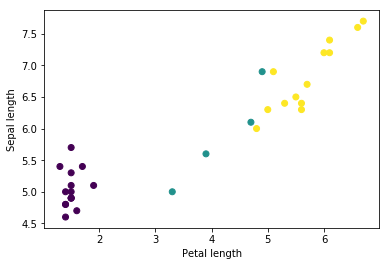

In [8]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");

In [9]:
def pack_features_vector(features,labels):
    features = tf.stack(list(features.values()),axis=1)
    return features,labels

In [10]:
train_dataset = train_dataset.map(pack_features_vector)

In [11]:
features,labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.  2.2 5.  1.5]
 [5.  3.2 1.2 0.2]
 [4.7 3.2 1.6 0.2]
 [5.2 2.7 3.9 1.4]
 [5.8 4.  1.2 0.2]], shape=(5, 4), dtype=float32)


## 使用Kears创建模型

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(4,)),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

## 使用该模型

In [13]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=216, shape=(5, 3), dtype=float32, numpy=
array([[-0.6776236 , -0.4149679 , -1.2987282 ],
       [-0.30472076, -0.66517675, -0.58320355],
       [-0.31400746, -0.4691741 , -0.6074594 ],
       [-0.60936826, -0.34309918, -1.0163167 ],
       [-0.34860212, -0.76182985, -0.6327324 ]], dtype=float32)>

In [14]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=222, shape=(5, 3), dtype=float32, numpy=
array([[0.35239437, 0.45824623, 0.18935932],
       [0.4074499 , 0.28413856, 0.3084116 ],
       [0.384326  , 0.32908776, 0.28658617],
       [0.33661366, 0.43930984, 0.2240765 ],
       [0.41421926, 0.27401084, 0.3117698 ]], dtype=float32)>

In [15]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1]
    Labels: [2 0 0 1 0 2 0 0 2 2 0 2 1 1 2 1 2 1 2 2 2 0 2 1 2 0 0 1 1 0 0 2]


## 训练模型

### 定义损失和梯度函数

In [16]:
def loss(model,x,y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y,logits=y_)

l = loss(model,features,labels)
print('Loss test:{}'.format(l))

Loss test:1.2252798080444336


In [17]:
def grad(model,inputs,targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model,inputs,targets)
    return loss_value,tape.gradient(loss_value,model.trainable_variables)

### 创建优化器

<img src="opt1.gif" style="width:620px;height:480px;">

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.train.get_or_create_global_step()

In [19]:
loss_value,grads = grad(model,features,labels)

print("Step:{},Initial Loss:{}".format(global_step.numpy(),loss_value.numpy()))
optimizer.apply_gradients(zip(grads,model.variables),global_step)

print("step:{},          Loss:{}".format(global_step.numpy(),loss(model,features,labels).numpy()))

Step:0,Initial Loss:1.2252798080444336
step:1,          Loss:1.08536958694458


## 循环训练

In [20]:
# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    # Training loop - using batches of 32
    for x,y in train_dataset:
        loss_value,grads = grad(model,x,y)
        optimizer.apply_gradients(zip(grads,model.variables),
                                 global_step)
        #跟踪训练进程
        epoch_loss_avg(loss_value) # add current batch loss
        # compare predicted label to actual label
        epoch_accuracy(tf.argmax(model(x),axis=1,output_type=tf.int32),y)

        #end epoch
        train_loss_results.append(epoch_loss_avg.result())
        train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.054, Accuracy: 34.167%
Epoch 050: Loss: 0.397, Accuracy: 90.833%
Epoch 100: Loss: 0.260, Accuracy: 97.500%
Epoch 150: Loss: 0.173, Accuracy: 96.667%
Epoch 200: Loss: 0.137, Accuracy: 98.333%


## 随着时间的推移可视化损失函数

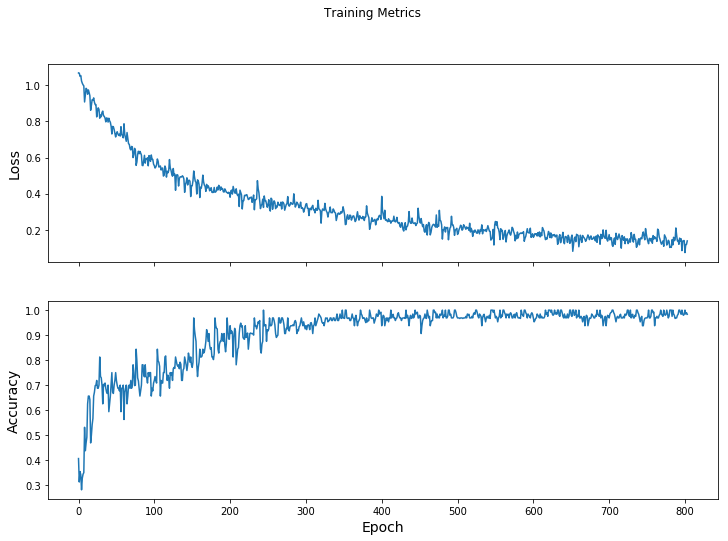

In [21]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss",fontsize = 14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy",fontsize=14)
axes[1].set_xlabel("Epoch",fontsize=14)
axes[1].plot(train_accuracy_results)